# Find tasks with optimum at the grid's limits

This notebook might help to find out if the parameter grids are suitable or need to be extended. 



In [4]:
devtools::load_all("../occCompaRe")
devtools::load_all(".")

Loading occCompare
Loading occCompareExp


In [3]:
parcc <- set_expOpts("revision1", "b")
res <- load_results(c(".trainUtest", ".resampling"), verbosity=1, overwrite=FALSE)


Loading results from D:/Diss/occcomp/results_rdata_agri6clUforest/sum_revision1b/results.RDS 


## Check if the number of models is as expected

In [4]:
nmodels = lapply(res, nrow)
nmodels

$binsvm
[1] 15120

$ocsvm
[1] 18480

$bsvm
[1] 75600

$maxent
[1] 3360

$maxentDef
[1] 240

In [5]:
prod(sapply(parcc$param$binsvm, length))*240 == nmodels$binsvm
prod(sapply(parcc$param$ocsvm, length))*240 == nmodels$ocsvm
prod(sapply(parcc$param$bsvm, length))*240 == nmodels$bsvm
prod(sapply(parcc$param$maxent, length))*240 == nmodels$maxent

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

## Parameters with max. (test) performance 

Get the best models of each task:

In [6]:
res_max = lapply(res, function(x) 
  x %>% slice(which.max(mxK)))

### Parameter frequency - sigma

In [7]:
rbind(binvm=table(res_max$binsvm$sigma),
      bsvm=table(res_max$bsvm$sigma),
      ocsvm=table(res_max$ocsvm$sigma))

,0.000244140625,0.0009765625,0.00390625,0.015625,0.0625,0.25,1
binvm,8,24,33,62,65,29,19
bsvm,25,20,43,48,48,39,17
ocsvm,2,2,7,24,111,85,9


### Parameter frequency - C

In [9]:
rbind(binvm=table(res_max$binsvm$C),
      bsvm=table(res_max$bsvm$cNeg))

,0.0078125,0.03125,0.125,0.5,2,8,32,128,512
binvm,24,4,8,25,39,49,29,35,27
bsvm,63,22,26,33,26,15,20,19,16


### Parameter frequency - nu

In [10]:
rbind(binvm=table(res_max$ocsvm$nu))

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
binvm,61,17,8,16,10,26,11,19,12,23,37


### Parameter frequency - beta

In [11]:
rbind(binvm=table(res_max$maxent$beta))

,0.015625,0.0625,0.25,1,4,16,64
binvm,11,14,33,111,48,22,1


## Parameters with max. (test) performance - at grid border only

### Count the occurences over all tasks

In [29]:
cls

[1] "binsvm" "ocsvm"  "bsvm"   "maxent"

In [33]:
cls <- names(res)[!names(res)=="maxentDef"] # for maxentDef it does not make sense - only one model
names(cls) = cls # just that a named list is returned below
ignore = list(binsvm=NULL,
              bsvm=NULL,
              ocsvm=list(nu=c("upper", "lower")),
              maxent=list(fc=c("upper", "lower")))
param_at_limit <- lapply(cls, function(nm) check_parameter_grids(method=nm, res=res, ignore=ignore[[nm]]))

fc  (factor) added to ignore.


In [34]:
n_border_cases <- lapply(param_at_limit, function(x) sum(apply(!is.na(x), 1, any)))
n_border_cases

$binsvm
[1] 104

$ocsvm
[1] 12

$bsvm
[1] 151

$maxent
[1] 16

### Visualize the grids 

#### OCSVM as an example also works for the others

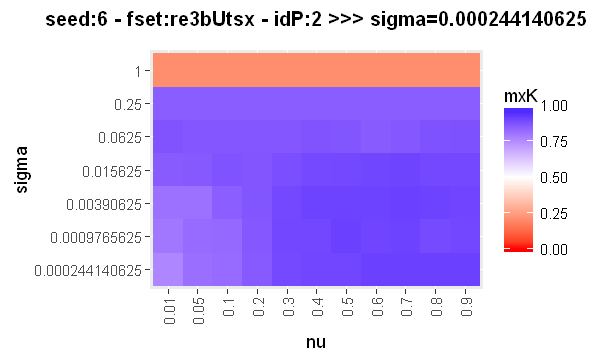

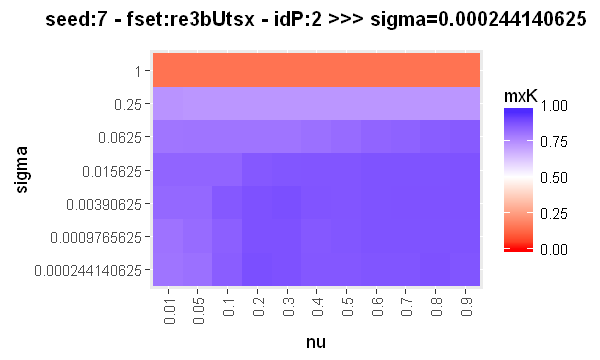

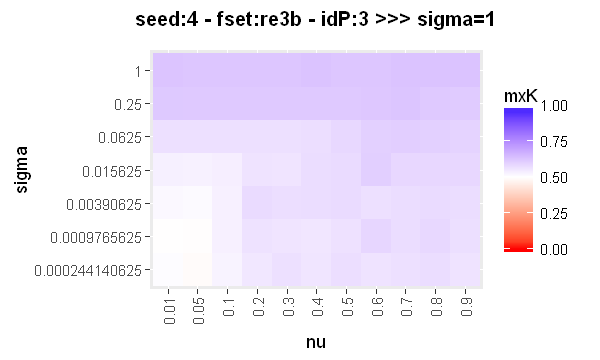

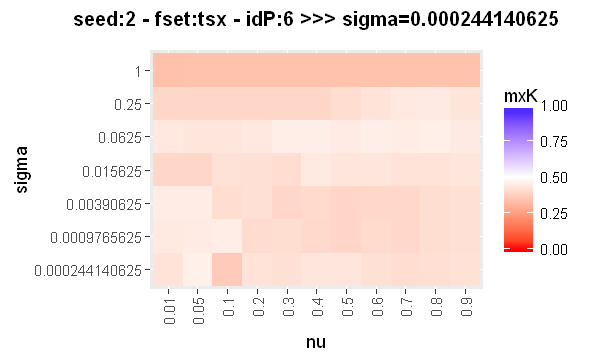

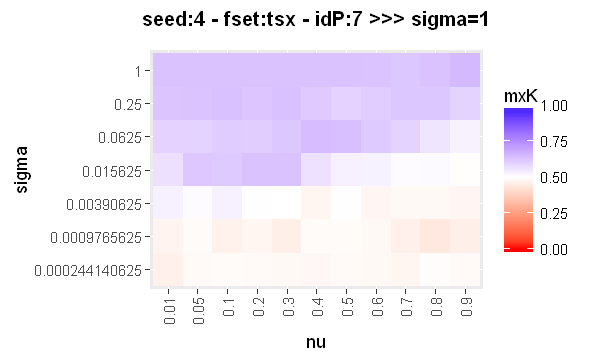

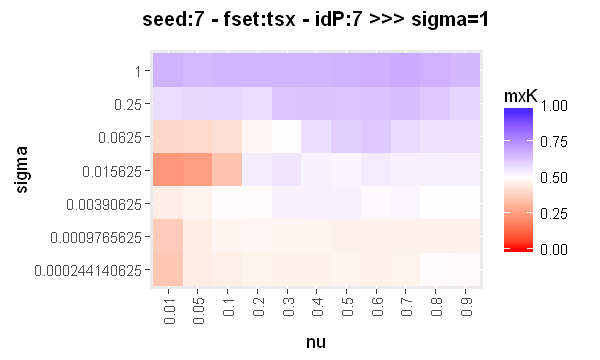

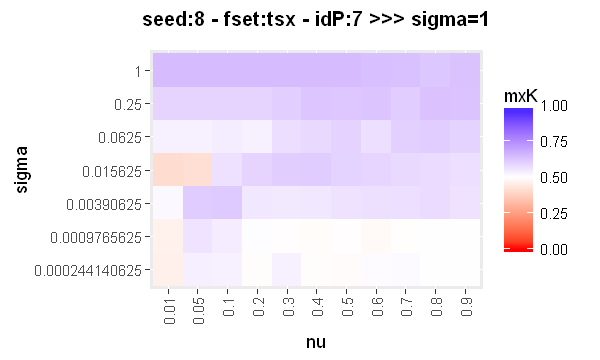

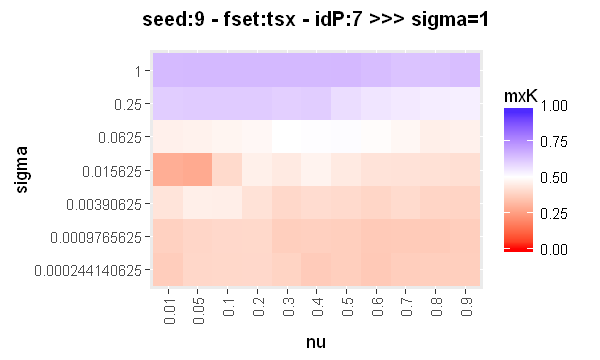

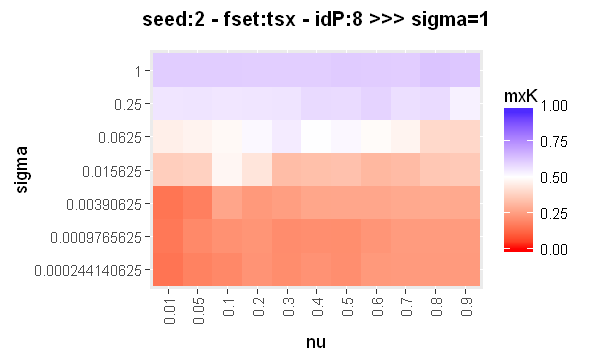

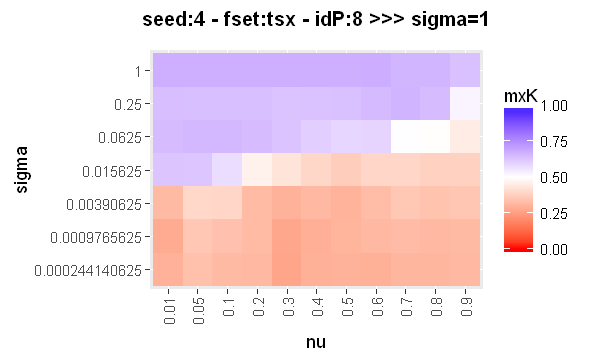

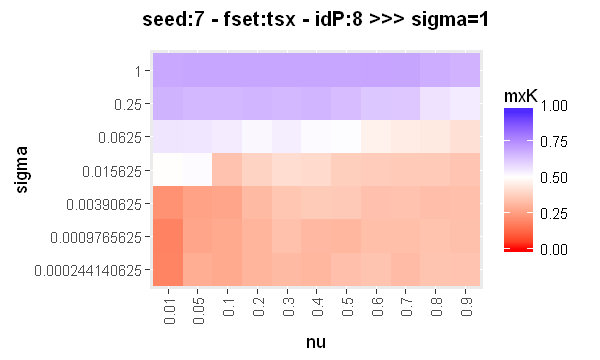

12 of 240 tasks with optimum at the parameter grid border.
'facet_grid' formula:  seed+fset+idP ~ .

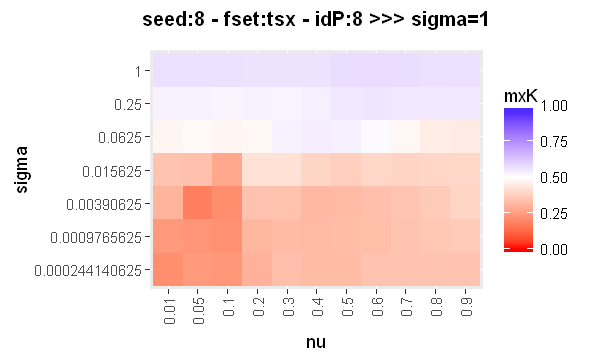

In [7]:
options(repr.plot.width=5, repr.plot.height=3)

ggp <- ggp_parameter_grids(method="ocsvm", x="nu", y="sigma", facet_x=NULL, 
                           res=res, grid_boder_cases_only=TRUE, ignore=list(nu=c("lower", "upper")),
                           print_single_grids=TRUE, verbose=TRUE)